Best solution: 2.9992309043745022
Best cost: 4.000000591508081


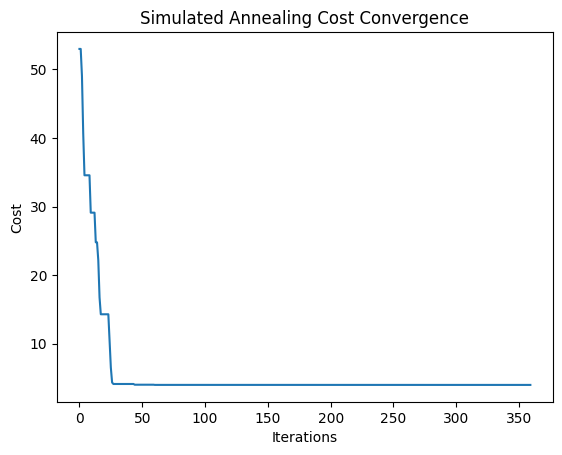

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Objective function: (x - 3)^2 + 4
def objective_function(x):
    return (x - 3)**2 + 4

# Simulated Annealing function
def simulated_annealing(objective_func, x0, T0, cooling_rate, max_iter):
    x = x0  # Initial solution
    T = T0  # Initial temperature
    best_solution = x
    best_cost = objective_func(x)
    
    history = []  # To track cost history

    for i in range(max_iter):
        # Generate a new candidate solution by random perturbation
        x_new = x + np.random.uniform(-1, 1)
        cost_new = objective_func(x_new)
        cost_current = objective_func(x)

        # Accept new solution with a certain probability
        if cost_new < cost_current or np.random.rand() < np.exp(-(cost_new - cost_current) / T):
            x = x_new
            if cost_new < best_cost:
                best_solution = x_new
                best_cost = cost_new

        # Cool down temperature
        T = T * cooling_rate
        history.append(best_cost)

        # Stopping criteria
        if T < 1e-6:
            break

    return best_solution, best_cost, history

# Initial values
x0 = 10  # Initial guess
T0 = 100  # Initial temperature
cooling_rate = 0.95  # Cooling rate
max_iter = 1000  # Number of iterations

# Run simulated annealing
best_solution, best_cost, cost_history = simulated_annealing(objective_function, x0, T0, cooling_rate, max_iter)

print(f"Best solution: {best_solution}")
print(f"Best cost: {best_cost}")

# Plot cost history
plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Simulated Annealing Cost Convergence')
plt.show()